<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-08-13 12:17:42.277141


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print(us['confirmed'].sum())
    print('US Deaths')
    print(us['deaths'].sum())
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('')

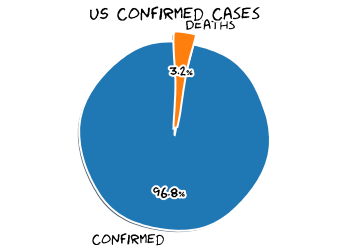

US Population
330362592
US Confirmed
5197749
US Deaths
165787
5197749 (1.573346718383902% of population)

New York City Confirmed
228729
New York City Deaths
23602

Philippines Confirmed
147526
Philippines Deaths
2426



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

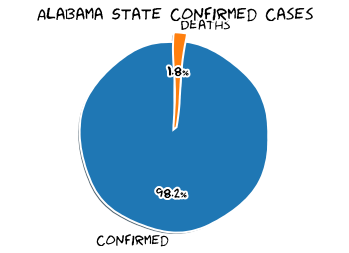

Alabama State Total Population
4887871
Alabama State Confirmed
104786 (2.143796348144212% of population)
Alabama State Deaths
1882 (1.796041455919684% of confirmed)



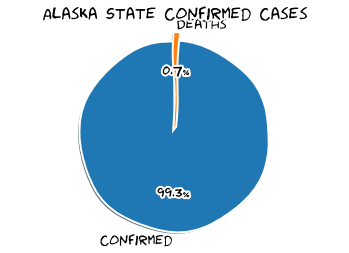

Alaska State Total Population
737438
Alaska State Confirmed
3879 (0.5260103222236988% of population)
Alaska State Deaths
27 (0.6960556844547563% of confirmed)



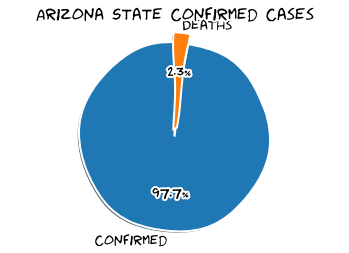

Arizona State Total Population
7171646
Arizona State Confirmed
189443 (2.641555369576245% of population)
Arizona State Deaths
4347 (2.29462160122042% of confirmed)



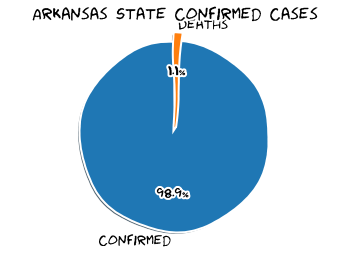

Arkansas State Total Population
3013825
Arkansas State Confirmed
51096 (1.6953870911549276% of population)
Arkansas State Deaths
572 (1.1194614059808987% of confirmed)



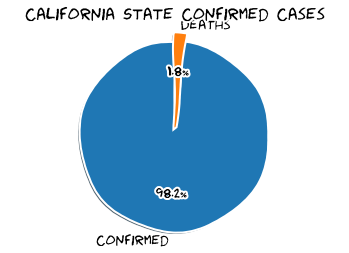

California State Total Population
39557045
California State Confirmed
591376 (1.4949953920976655% of population)
California State Deaths
10753 (1.8183017234382186% of confirmed)



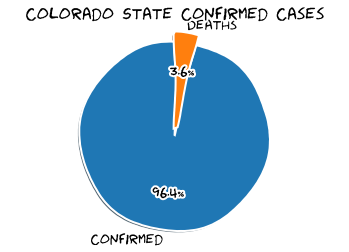

Colorado State Total Population
5695564
Colorado State Confirmed
51737 (0.9083736044402275% of population)
Colorado State Deaths
1875 (3.624098807429886% of confirmed)



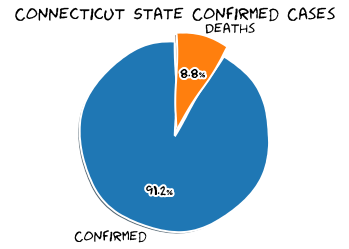

Connecticut State Total Population
3572665
Connecticut State Confirmed
50706 (1.4192766464250077% of population)
Connecticut State Deaths
4450 (8.776081726028478% of confirmed)



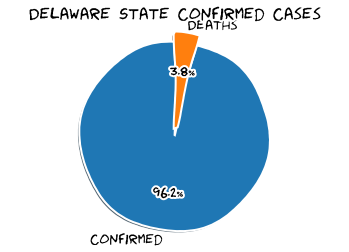

Delaware State Total Population
967171
Delaware State Confirmed
15765 (1.6300116525412776% of population)
Delaware State Deaths
592 (3.755153821757057% of confirmed)



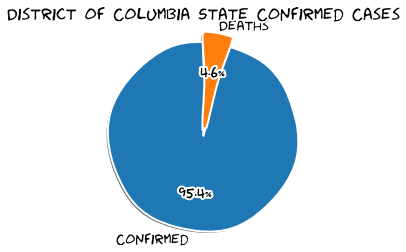

District of Columbia State Total Population
702455
District of Columbia State Confirmed
12959 (1.8448156821433401% of population)
District of Columbia State Deaths
593 (4.575970368083957% of confirmed)



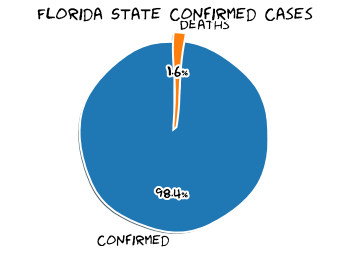

Florida State Total Population
21299325
Florida State Confirmed
550901 (2.586471637011971% of population)
Florida State Deaths
8765 (1.5910299672717965% of confirmed)



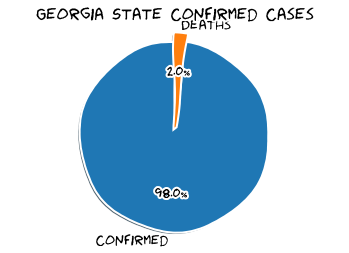

Georgia State Total Population
10519475
Georgia State Confirmed
226153 (2.1498506341808885% of population)
Georgia State Deaths
4456 (1.9703475081029216% of confirmed)



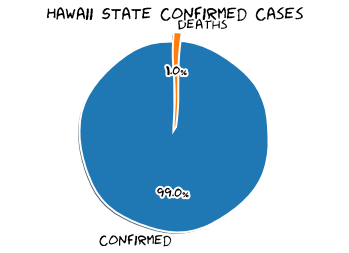

Hawaii State Total Population
1420491
Hawaii State Confirmed
3958 (0.2786360490844363% of population)
Hawaii State Deaths
38 (0.9600808489135927% of confirmed)



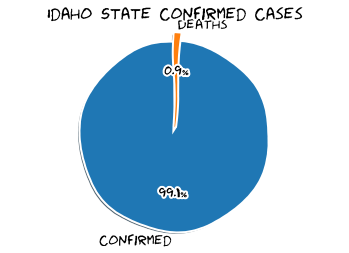

Idaho State Total Population
1754208
Idaho State Confirmed
26134 (1.4897891242087598% of population)
Idaho State Deaths
246 (0.9413025177929135% of confirmed)



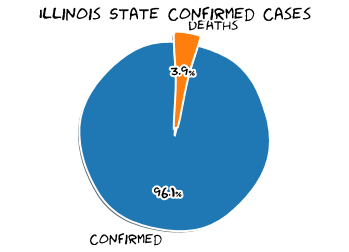

Illinois State Total Population
12741080
Illinois State Confirmed
199893 (1.5688858401328616% of population)
Illinois State Deaths
7881 (3.9426092959733454% of confirmed)



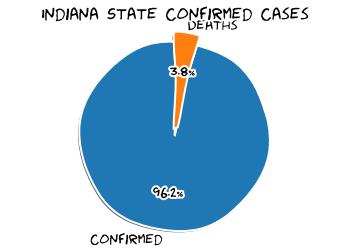

Indiana State Total Population
6691878
Indiana State Confirmed
76522 (1.143505604854123% of population)
Indiana State Deaths
2878 (3.7610099056480486% of confirmed)



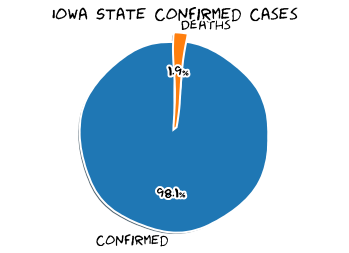

Iowa State Total Population
3156145
Iowa State Confirmed
50003 (1.5843061709775692% of population)
Iowa State Deaths
954 (1.9078855268683879% of confirmed)



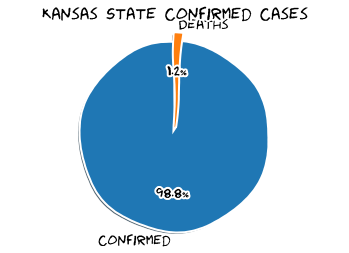

Kansas State Total Population
2911510
Kansas State Confirmed
32097 (1.1024176458263926% of population)
Kansas State Deaths
396 (1.2337601645013554% of confirmed)



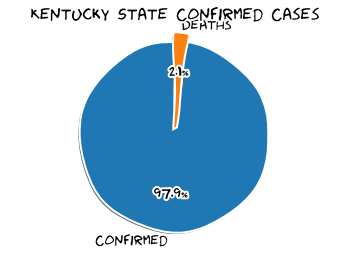

Kentucky State Total Population
4468402
Kentucky State Confirmed
36945 (0.8268056455081705% of population)
Kentucky State Deaths
790 (2.138313709568277% of confirmed)



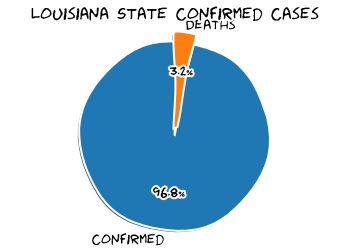

Louisiana State Total Population
4659978
Louisiana State Confirmed
134304 (2.8820736921933965% of population)
Louisiana State Deaths
4356 (3.2433881343817013% of confirmed)



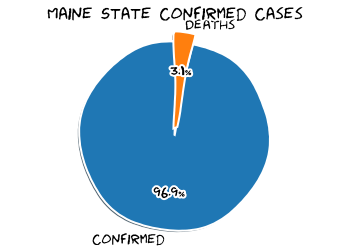

Maine State Total Population
1338404
Maine State Confirmed
4070 (0.30409353229667574% of population)
Maine State Deaths
126 (3.095823095823096% of confirmed)



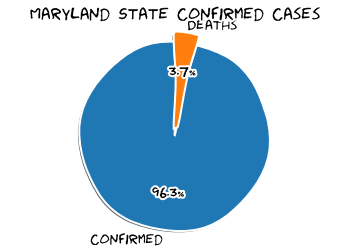

Maryland State Total Population
6042718
Maryland State Confirmed
97384 (1.6115926640958587% of population)
Maryland State Deaths
3598 (3.694652098907418% of confirmed)



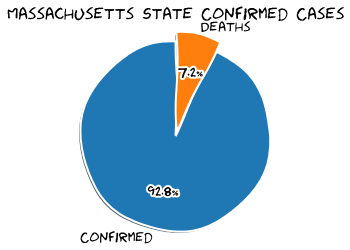

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
121707 (1.7633203803626958% of population)
Massachusetts State Deaths
8751 (7.190219132835416% of confirmed)



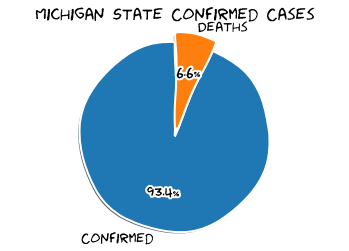

Michigan State Total Population
9995915
Michigan State Confirmed
98689 (0.987293309316856% of population)
Michigan State Deaths
6539 (6.625865091347567% of confirmed)



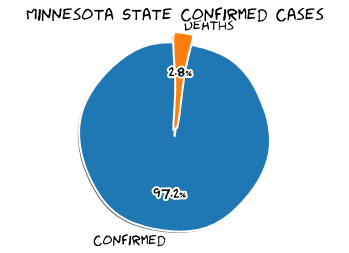

Minnesota State Total Population
5611179
Minnesota State Confirmed
62303 (1.1103370610704095% of population)
Minnesota State Deaths
1724 (2.7671219684445374% of confirmed)



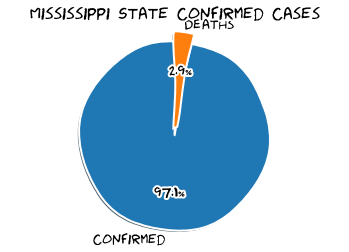

Mississippi State Total Population
2986530
Mississippi State Confirmed
69374 (2.3228964718251617% of population)
Mississippi State Deaths
1989 (2.867068354138438% of confirmed)



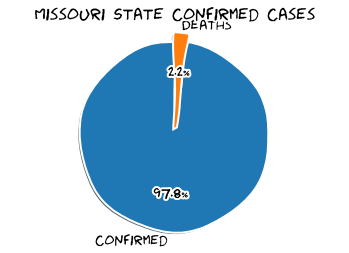

Missouri State Total Population
6126452
Missouri State Confirmed
62956 (1.0276094548688213% of population)
Missouri State Deaths
1354 (2.1507084312853424% of confirmed)



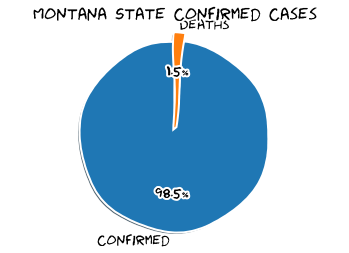

Montana State Total Population
1062305
Montana State Confirmed
5268 (0.4959027774509204% of population)
Montana State Deaths
80 (1.518602885345482% of confirmed)



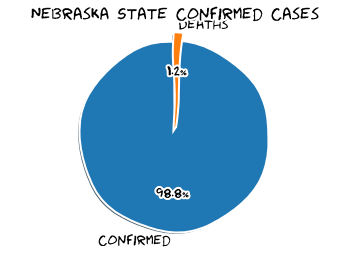

Nebraska State Total Population
1929268
Nebraska State Confirmed
29244 (1.5158080681377601% of population)
Nebraska State Deaths
356 (1.2173437286280948% of confirmed)



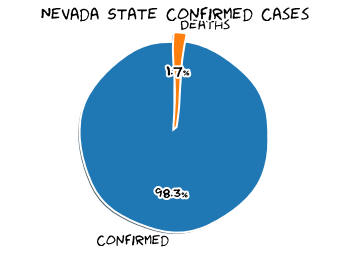

Nevada State Total Population
3034392
Nevada State Confirmed
58048 (1.9130026707162424% of population)
Nevada State Deaths
996 (1.7158213891951486% of confirmed)



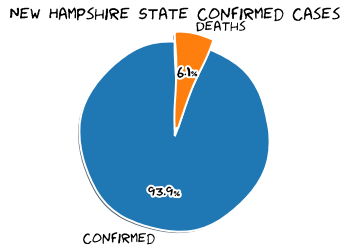

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
6887 (0.5077193691216388% of population)
New Hampshire State Deaths
420 (6.098446348192247% of confirmed)



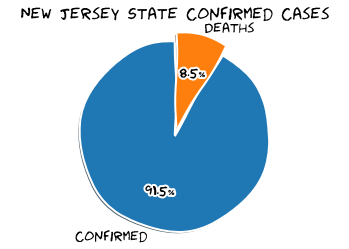

New Jersey State Total Population
8908520
New Jersey State Confirmed
185938 (2.087192934404368% of population)
New Jersey State Deaths
15885 (8.543170304079855% of confirmed)



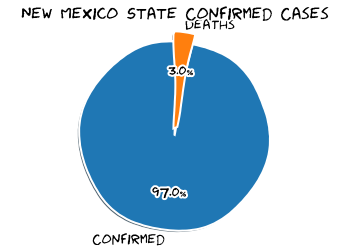

New Mexico State Total Population
2095428
New Mexico State Confirmed
22816 (1.0888467654340783% of population)
New Mexico State Deaths
695 (3.0461079943899017% of confirmed)



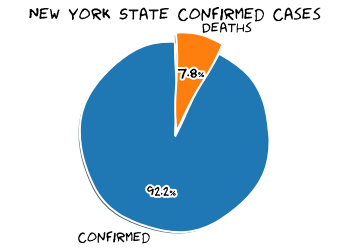

New York State Total Population
19542209
New York State Confirmed
422703 (2.163025684557974% of population)
New York State Deaths
32797 (7.758875617159093% of confirmed)



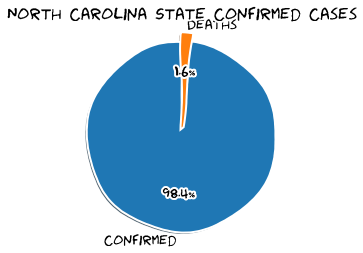

North Carolina State Total Population
10383620
North Carolina State Confirmed
139739 (1.3457638087680404% of population)
North Carolina State Deaths
2290 (1.6387694201332483% of confirmed)



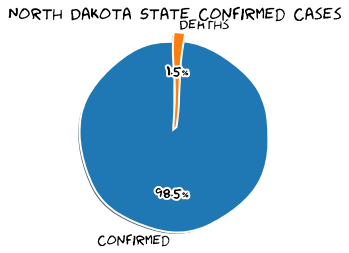

North Dakota State Total Population
760077
North Dakota State Confirmed
8171 (1.0750226621776477% of population)
North Dakota State Deaths
120 (1.4686084934524537% of confirmed)



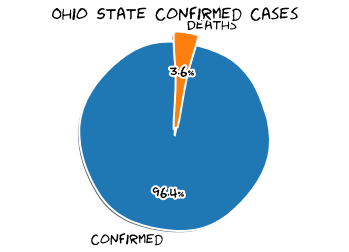

Ohio State Total Population
11689442
Ohio State Confirmed
104248 (0.89181331324455% of population)
Ohio State Deaths
3734 (3.581843296753895% of confirmed)



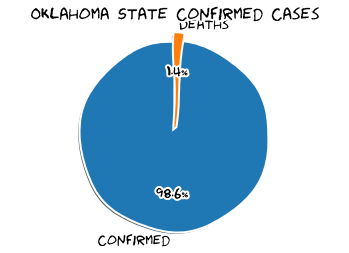

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
45398 (1.1513337673427289% of population)
Oklahoma State Deaths
627 (1.3811181109299968% of confirmed)



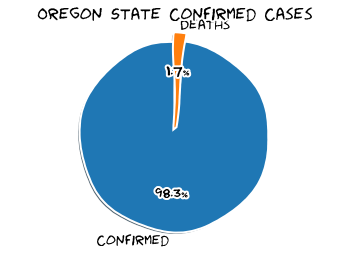

Oregon State Total Population
4190713
Oregon State Confirmed
22022 (0.5254953035438122% of population)
Oregon State Deaths
375 (1.7028426119335212% of confirmed)



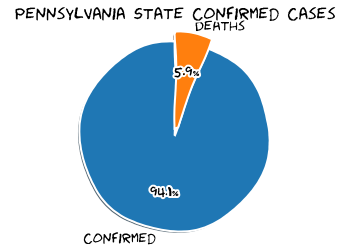

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
125918 (0.9831920831166561% of population)
Pennsylvania State Deaths
7380 (5.860957130831176% of confirmed)



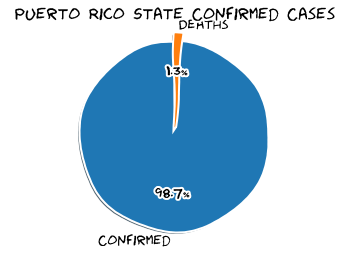

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
24446 (0.7650963819259986% of population)
Puerto Rico State Deaths
306 (1.2517385257301807% of confirmed)



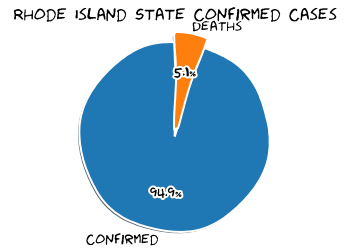

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
20129 (1.9037845864288316% of population)
Rhode Island State Deaths
1018 (5.057379899647275% of confirmed)



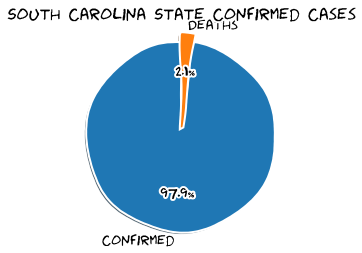

South Carolina State Total Population
5084127
South Carolina State Confirmed
102974 (2.0254018044789204% of population)
South Carolina State Deaths
2144 (2.0820789713908368% of confirmed)



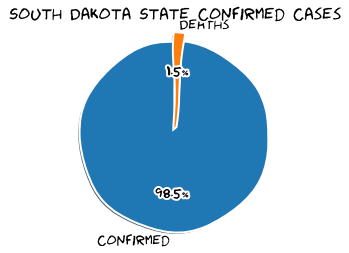

South Dakota State Total Population
882235
South Dakota State Confirmed
9815 (1.112515372888176% of population)
South Dakota State Deaths
147 (1.4977075904228223% of confirmed)



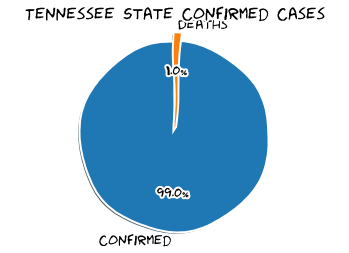

Tennessee State Total Population
6770010
Tennessee State Confirmed
126393 (1.8669544062711874% of population)
Tennessee State Deaths
1289 (1.0198349592145135% of confirmed)



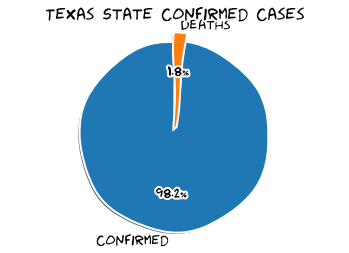

Texas State Total Population
28701845
Texas State Confirmed
523977 (1.825586473622166% of population)
Texas State Deaths
9527 (1.81820957790132% of confirmed)



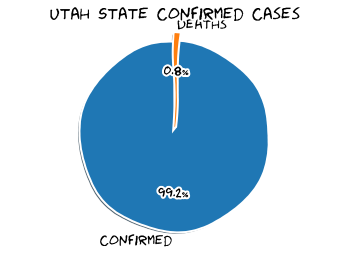

Utah State Total Population
3161105
Utah State Confirmed
45090 (1.4263999455886471% of population)
Utah State Deaths
351 (0.7784431137724551% of confirmed)



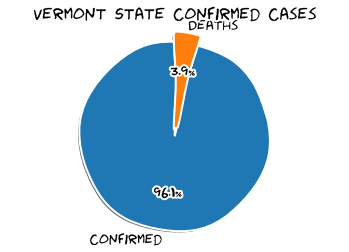

Vermont State Total Population
626299
Vermont State Confirmed
1478 (0.23598951938291454% of population)
Vermont State Deaths
58 (3.924221921515562% of confirmed)



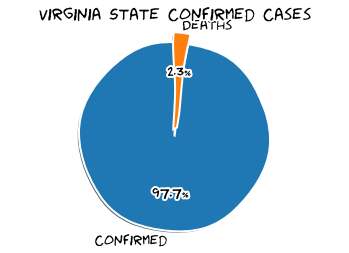

Virginia State Total Population
8517685
Virginia State Confirmed
102521 (1.203625163410011% of population)
Virginia State Deaths
2352 (2.294164122472469% of confirmed)



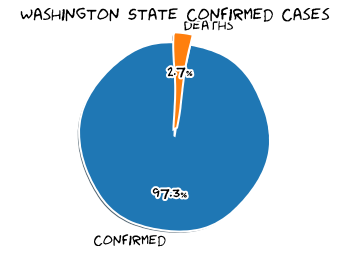

Washington State Total Population
7535591
Washington State Confirmed
64702 (0.8586187865026114% of population)
Washington State Deaths
1724 (2.6645235077741027% of confirmed)



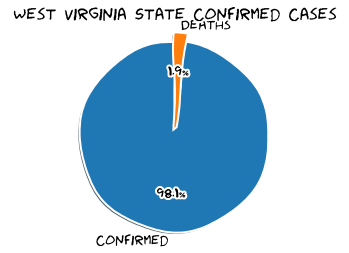

West Virginia State Total Population
1805832
West Virginia State Confirmed
8018 (0.44400586544041754% of population)
West Virginia State Deaths
153 (1.908206535295585% of confirmed)



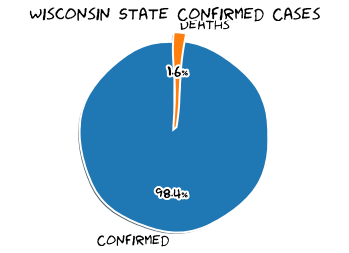

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
62263 (1.0709946112267028% of population)
Wisconsin State Deaths
1011 (1.6237572876347108% of confirmed)



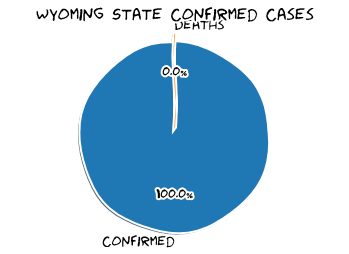

Wyoming State Total Population
577737
Wyoming State Confirmed
3086 (0.5341530834964698% of population)
Wyoming State Deaths
1 (0.03240440699935191% of confirmed)



In [12]:
for i in states:
    state_details(i)

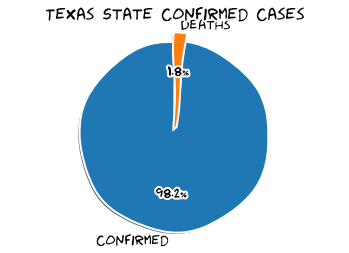

Texas State Total Population
28701845
Texas State Confirmed
523977 (1.825586473622166% of population)
Texas State Deaths
9527 (1.81820957790132% of confirmed)



In [13]:
state_details('Texas')

In [14]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 20648298},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 749965},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-08-13T11:27:22.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 12849485},
 'source': 'https://github.com/mathdroid/covid19'}

In [15]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [16]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,,,,Afghanistan,2020-08-13 04:29:15,33.93911,67.709953,37345,1354,26694,9297,Afghanistan,95.93267794278722,3.6256526978176464
1,,,,Albania,2020-08-13 04:29:15,41.1533,20.1683,6817,208,3552,3057,Albania,236.882340676906,3.051195540560364
2,,,,Algeria,2020-08-13 04:29:15,28.0339,1.6596,36699,1333,25627,9739,Algeria,83.69014164611774,3.6322515599880107
3,,,,Andorra,2020-08-13 04:29:15,42.5063,1.5218,977,53,855,69,Andorra,1264.4793891153822,5.424769703172979
4,,,,Angola,2020-08-13 04:29:15,-11.2027,17.8739,1762,80,577,1105,Angola,5.361119796138704,4.540295119182747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,,,,West Bank and Gaza,2020-08-13 04:29:15,31.9522,35.2332,15184,105,8369,6710,West Bank and Gaza,297.6428505340478,0.6915173867228662
3939,,,,Western Sahara,2020-08-13 04:29:15,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3940,,,,Yemen,2020-08-13 04:29:15,15.552727,48.516388,1841,528,937,376,Yemen,6.172473597504027,28.680065181966324
3941,,,,Zambia,2020-08-13 04:29:15,-13.133897,27.849332,8501,246,7233,1022,Zambia,46.24140745332506,2.8937772026820374


In [17]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1597318042000,40.767273,-73.971526,228729,0,23602,205127,New York City,36061,"New York City, New York, US",2743.601065,None,None,84036061,USA
1,California,US,1597318042000,34.308284,-118.228241,214283,0,5112,209171,Los Angeles,06037,"Los Angeles, California, US",2134.482679,None,None,84006037,USA
2,Florida,US,1597318042000,25.611236,-80.551706,139271,0,1939,137332,Miami-Dade,12086,"Miami-Dade, Florida, US",5126.024130,None,None,84012086,USA
3,Arizona,US,1597318042000,33.348359,-112.491815,127188,0,2493,124695,Maricopa,04013,"Maricopa, Arizona, US",2835.591096,None,None,84004013,USA
4,Illinois,US,1597318042000,41.841448,-87.816588,113044,0,4934,108110,Cook,17031,"Cook, Illinois, US",2194.929822,None,None,84017031,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,Nebraska,US,1597318042000,40.176585,-99.404389,1,0,0,1,Harlan,31083,"Harlan, Nebraska, US",29.585799,None,None,84031083,USA
3207,Nebraska,US,1597318042000,40.176092,-101.041648,1,0,0,1,Hitchcock,31087,"Hitchcock, Nebraska, US",36.205648,None,None,84031087,USA
3208,New Hampshire,US,1597318042000,NaN,NaN,1,0,0,1,Unassigned,90033,"Unassigned, New Hampshire, US",NaN,None,None,84090033,USA
3209,New Mexico,US,1597318042000,35.857516,-103.822094,1,0,0,1,Harding,35021,"Harding, New Mexico, US",160.000000,None,None,84035021,USA


In [18]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1597318042000,40.767273,-73.971526,228729,0,23602,205127,New York City,36061,"New York City, New York, US",2743.601065,None,None,84036061,USA
9,New York,US,1597318042000,40.883201,-72.801217,43948,0,1998,41950,Suffolk,36103,"Suffolk, New York, US",2976.294883,None,None,84036103,USA
10,New York,US,1597318042000,40.740665,-73.589419,43761,0,2195,41566,Nassau,36059,"Nassau, New York, US",3225.014813,None,None,84036059,USA
16,New York,US,1597318042000,41.162784,-73.757417,36324,0,1447,34877,Westchester,36119,"Westchester, New York, US",3754.395322,None,None,84036119,USA
67,New York,US,1597318042000,41.150279,-74.025605,13966,0,674,13292,Rockland,36087,"Rockland, New York, US",4286.823680,None,None,84036087,USA
87,New York,US,1597318042000,41.403375,-74.302408,11191,0,491,10700,Orange,36071,"Orange, New York, US",2907.206318,None,None,84036071,USA
120,New York,US,1597318042000,42.762490,-78.730637,9013,0,671,8342,Erie,36029,"Erie, New York, US",981.058058,None,None,84036029,USA
203,New York,US,1597318042000,43.146389,-77.693229,5035,0,285,4750,Monroe,36055,"Monroe, New York, US",678.781833,None,None,84036055,USA
212,New York,US,1597318042000,41.764861,-73.743567,4631,0,153,4478,Dutchess,36027,"Dutchess, New York, US",1574.002950,None,None,84036027,USA
264,New York,US,1597318042000,43.004919,-76.199712,3613,0,200,3413,Onondaga,36067,"Onondaga, New York, US",784.534274,None,None,84036067,USA


In [19]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

422703

In [20]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1597318042000,40.767273,-73.971526,228729,0,23602,205127,New York City,36061,"New York City, New York, US",2743.601065,None,None,84036061,USA


In [21]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
25,None,Philippines,1597318042000,12.879721,121.774017,147526,70387,2426,74713,None,None,Philippines,134.627249,None,None,608,PHL,PH


In [22]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
